In [1]:
#Import the needed packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the dataset
df  = pd.read_csv('../input/USA_Housing.csv')

In [3]:
#Look at the dataset
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#Looking the data types of dataset
#df.info()

In [5]:
#Looking at mathematical stats for the datasets
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

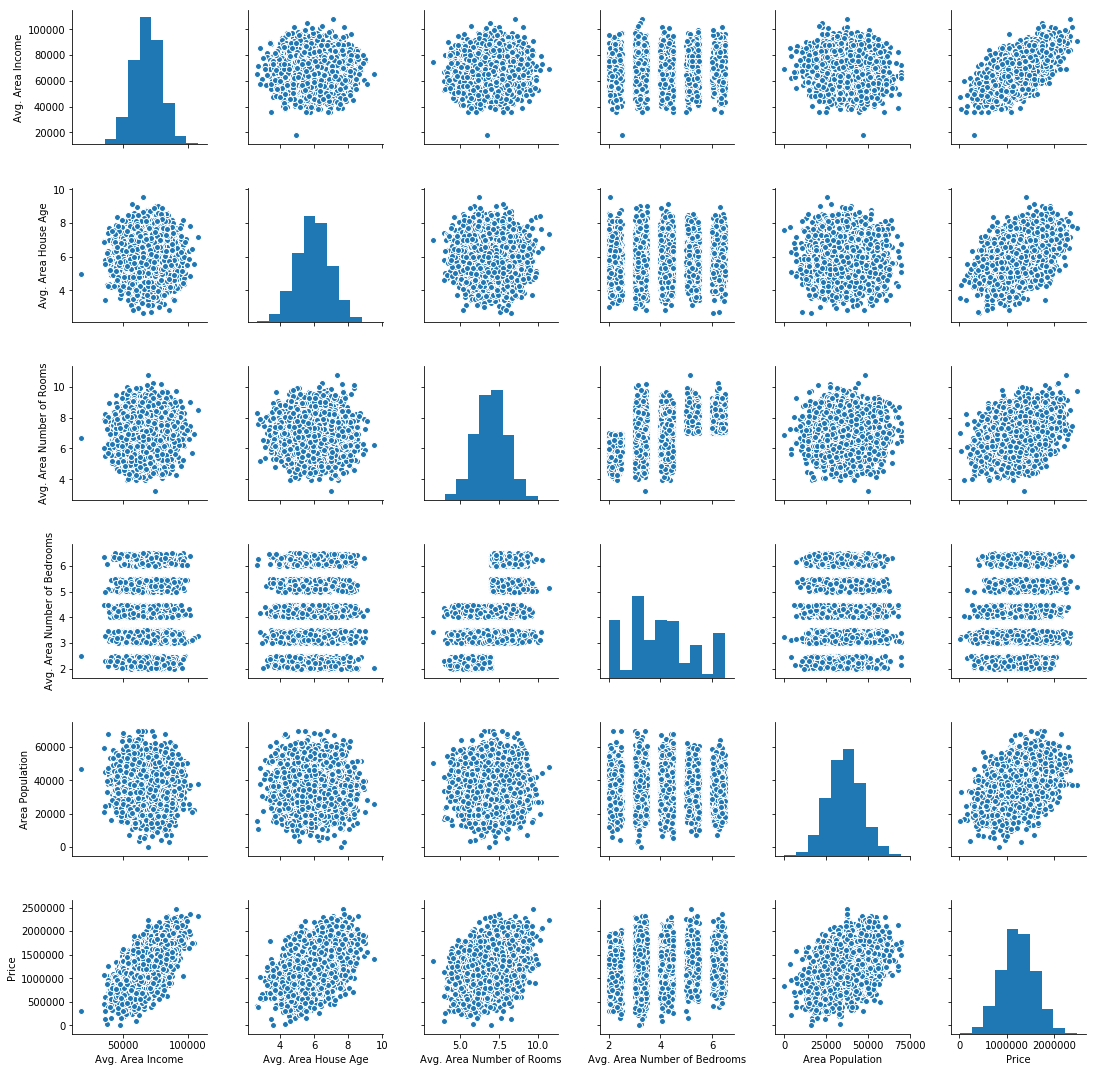

In [7]:
#Creating the pair-plot for the dataset 
sns.pairplot(df)

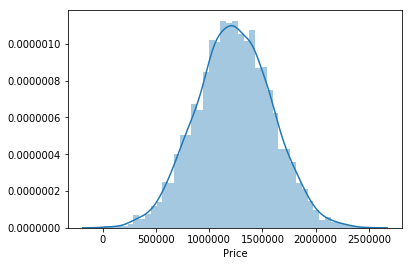

In [8]:
#Creating distribution plot for the price
#To see how the price is distributed along the dataset
sns.distplot(df['Price'])

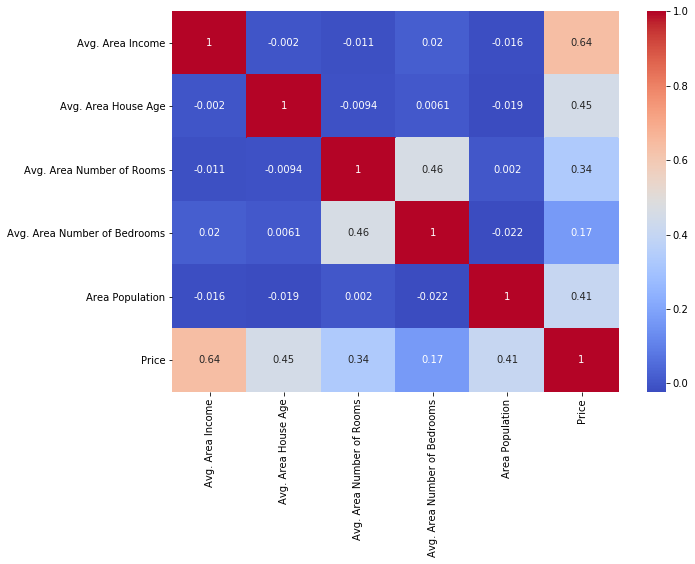

In [9]:
#making a heatmap for the correlation of dataset
fig = plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True,cmap = "coolwarm")

In [10]:
#Predicting Features
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [11]:
#response feature
y = df['Price']

In [12]:
from sklearn.cross_validation import train_test_split

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#Dividing our dataset in train and test data's
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.4, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#lets fit a model
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#Intercept for our predictions
print(lm.intercept_)

-2640159.79685


In [18]:
#Coefficient for our predictions
lm.coef_

array([  2.15282755e+01,   1.64883282e+05,   1.22368678e+05,
         2.23380186e+03,   1.51504200e+01])

In [19]:
#Joining the coefficient with its features
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ['coeff'])

In [20]:
cdf

,coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [21]:
#predicting the models for test dataset
predictions = lm.predict(X_test)

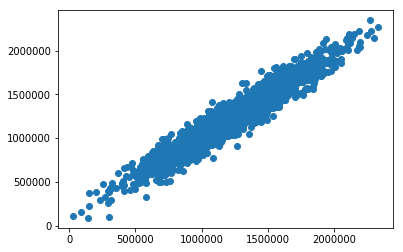

In [22]:
#Plotting the predictions
plt.scatter(y_test, predictions)

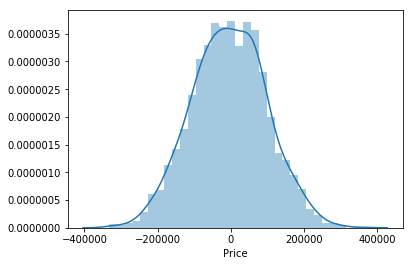

In [23]:
#Residuals
sns.distplot((y_test-predictions))

In [24]:
from sklearn import metrics

In [25]:
#Some mathametics errors
#lesser the error more accurate is our predictions.
#Mean absolute error
metrics.mean_absolute_error(y_test, predictions)

82288.222519149538

In [26]:
#Mean squared error
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [27]:
#Root mean squared error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153